# Movies, Movies, Movies!

The data obtained in this project will comes directly from https://www.kaggle.com/code/rafburzy/movies-dataset-analysis/data.
Movie data ranging from 1980-2020 that was scraped from IMDB.com and complied into a csv file.


**-Hypothesis** What was the most popular Genre of movie for the 90s (1990-1999) based on average IMDB rating? Does that differ if we use the gross box office sales as a marker for populairty instead?<br>


In [981]:
import os

#Get current working directory
cwd = os.getcwd()

#Construct a path to the zip file in the subdirectory 'data'
file_path = os.path.join(cwd, 'data', 'movies.csv.zip')



## The dataset below serves as a sample set of what was explored

In [982]:
import zipfile
import pandas as pd

# Open the zip file and extract the CSV file
with zipfile.ZipFile(file_path, 'r') as zip_file:
    zip_file.extractall()

# Read the CSV file into a pandas DataFrame
movies_df = pd.read_csv('./data/movies.csv')

# Display the first few rows of the DataFrame
print(movies_df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [983]:
#The values in this list will be referenced/modified as needed 
#Displaying the dataframe this way is helpful, in that you can clearly see the index and which column 
#that corresponds to.
movies_df = pd.read_csv(file_path)
movies_df.columns
movies_df.shape
movies_df.info()
movies_df.isnull().sum().sort_values(ascending=False)
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Here is where the data 'cleaning' process begins

In [984]:
#Dropping all of the unnecessary columns in the original dataset
movies_df.drop(['rating', 'released', 'writer', 'star', 'country', 'budget', 'company', 'runtime'], axis=1, inplace=True )

#Here I am removing any items with null values from the remaining columns so that the data isnt't skewed
movies_df.dropna(subset=['name', 'genre', 'year', 'score', 'votes', 'director', 'gross'], inplace=True)
#Sorting the dataframe by year in Ascending order (chronologically)
movies_df.sort_values(['year'], ascending=[True], inplace = True) 
movies_df 

,name,genre,year,score,votes,director,gross
0,The Shining,Drama,1980,8.4,927000.0,Stanley Kubrick,46998772.0
67,The Fiendish Plot of Dr. Fu Manchu,Comedy,1980,5.1,2000.0,Piers Haggard,10697276.0
65,Fatso,Comedy,1980,6.3,2000.0,Anne Bancroft,7653061.0
64,Resurrection,Drama,1980,7.3,2800.0,Daniel Petrie,3910019.0
63,Honeysuckle Rose,Drama,1980,6.3,1400.0,Jerry Schatzberg,17815212.0
...,...,...,...,...,...,...,...
7645,Birds of Prey,Action,2020,6.1,190000.0,Cathy Yan,201858461.0
7643,Tenet,Action,2020,7.4,387000.0,Christopher Nolan,363656624.0
7657,Leap,Drama,2020,6.7,903.0,Peter Ho-Sun Chan,25818882.0
7649,Sonic the Hedgehog,Action,2020,6.5,102000.0,Jeff Fowler,319715683.0


## Now that we have a nice, complete dataset to look at, we'll move on to analyzing the data.

In [985]:
# Here we are slicing the data to only include films that premiered in the 90s and sorting them by year in ascending order.
#Notice how we are making a new dataframe that will be referenced for calculations.
#At a glance, we can see that the highest rated film of the 90s decade was "Goodfellas". This might give us a good indication of 
#the most popular Genre, but it is too soon to tell.
movies_90s_df = movies_df.loc[(movies_df['year'] >= 1990) & (movies_df['year'] <= 1999)].sort_values(['year', 'score'], ascending=[True, False])

movies_90s_df


,name,genre,year,score,votes,director,gross
1643,Goodfellas,Biography,1990,8.7,1100000.0,Martin Scorsese,46963277.0
1649,Dances with Wolves,Adventure,1990,8.0,247000.0,Kevin Costner,424208848.0
1656,Edward Scissorhands,Drama,1990,7.9,456000.0,Tim Burton,86024005.0
1659,Awakenings,Biography,1990,7.8,130000.0,Penny Marshall,52096475.0
1652,Misery,Drama,1990,7.8,191000.0,Rob Reiner,61276872.0
...,...,...,...,...,...,...,...
3554,Universal Soldier: the Return,Action,1999,4.2,28000.0,Mic Rodgers,10667893.0
3528,Inspector Gadget,Action,1999,4.2,46000.0,David Kellogg,134403112.0
3584,Dudley Do-Right,Comedy,1999,3.9,10000.0,Hugh Wilson,9974410.0
3594,Bats,Horror,1999,3.9,9900.0,Louis Morneau,10155690.0


In [986]:
# Here we are pulling the 'genre' column and the 'score' column from our new dataframe, combining all the entries in each individual
# Genre, and then calculating the average score of all those entries. 
genre_mean_rating_90s = movies_90s_df.groupby('genre')['score'].mean()
#Here we assign new index values for the columns to be referenced later on
genre_mean_rating_90s_df = genre_mean_rating_90s.to_frame().reset_index()
genre_mean_rating_90s_df.columns = ['genre', 'rating']
#Sorts the resulting dataframe by highest average score to lowest average score.
genre_mean_rating_90s_df = genre_mean_rating_90s_df.sort_values(by='rating', ascending=False)

genre_mean_rating_90s_df



,genre,rating
3,Biography,7.116484
2,Animation,6.834545
6,Drama,6.766998
5,Crime,6.714620
13,Thriller,6.400000
10,Mystery,6.354545
4,Comedy,6.240964
1,Adventure,6.121429
7,Family,6.100000
0,Action,6.032181


## Results
Above we can see that according to the average IMDB rating, 'Biography' was the most popular Genre of the 90s.

<Figure size 1000x600 with 0 Axes>

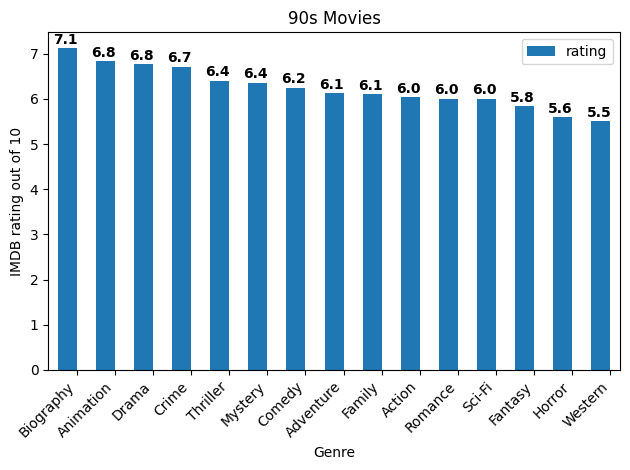

In [987]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot = genre_mean_rating_90s_df.plot(kind="bar", title="90s Movies", ylabel="IMDB rating out of 10", xlabel="Genre", x='genre')
plt.xticks(plot.get_xticks() + 0.25, genre_mean_rating_90s_df['genre'], rotation=45, ha='right')

for i, v in enumerate(genre_mean_rating_90s_df['rating']):
    plt.text(i - 0.38, v + 0.1, str(round(v, 1)), color='black', fontweight='bold')
                                                          
plt.tight_layout()


In [988]:
#This code expands on the original one to calculate the average score for each Genre throughout the entire dataframe (1980-2020)
# displaying them in the same order (highest to smallest)
genre_mean_rating_all = movies_df.groupby('genre')['score'].mean()
genre_mean_rating_all_df = genre_mean_rating_all.to_frame().reset_index()
genre_mean_rating_all_df.columns = ['genre', 'rating']
genre_mean_rating_all_df = genre_mean_rating_all_df.sort_values(by='rating', ascending=False)

genre_mean_rating_all_df


,genre,rating
11,Musical,8.050000
10,Music,7.200000
3,Biography,7.036952
2,Animation,6.772836
6,Drama,6.698229
5,Crime,6.680996
12,Mystery,6.665000
13,Romance,6.500000
14,Sci-Fi,6.387500
7,Family,6.363636


<Figure size 1000x600 with 0 Axes>

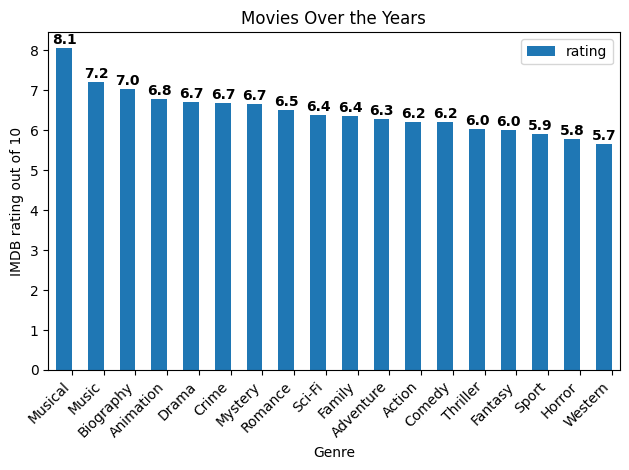

In [989]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot = genre_mean_rating_all_df.plot(kind="bar", title="Movies Over the Years", ylabel="IMDB rating out of 10", xlabel="Genre", x='genre')
plt.xticks(plot.get_xticks() + 0.25, genre_mean_rating_all_df['genre'], rotation=45, ha='right')

for i, v in enumerate(genre_mean_rating_all_df['rating']):
    plt.text(i - 0.38, v + 0.1, str(round(v, 1)), color='black', fontweight='bold')
                                                          
plt.tight_layout()

## Additional Results
Expanding the dataset to include all movies (1980-2020), reveals that the most liked Genre overall, according to IMDB ratings, is 'Musicals'. 



In [990]:
# Variation of original code in block 972 used to create a new dataframe listing gross sales instead of rating
genre_mean_sales_90s = movies_90s_df.groupby('genre')['gross'].mean()
genre_mean_sales_90s_df = genre_mean_sales_90s.to_frame().reset_index()
genre_mean_sales_90s_df.columns = ['genre', 'sales']
genre_mean_sales_90s_df = genre_mean_sales_90s_df.sort_values(by='sales', ascending=False)

genre_mean_sales_90s_df

,genre,sales
2,Animation,1.278179e+08
0,Action,8.659591e+07
1,Adventure,4.969083e+07
10,Mystery,4.823113e+07
13,Thriller,4.492671e+07
6,Drama,3.891950e+07
8,Fantasy,3.843638e+07
9,Horror,3.430541e+07
4,Comedy,3.389840e+07
5,Crime,3.320337e+07


<Figure size 1000x600 with 0 Axes>

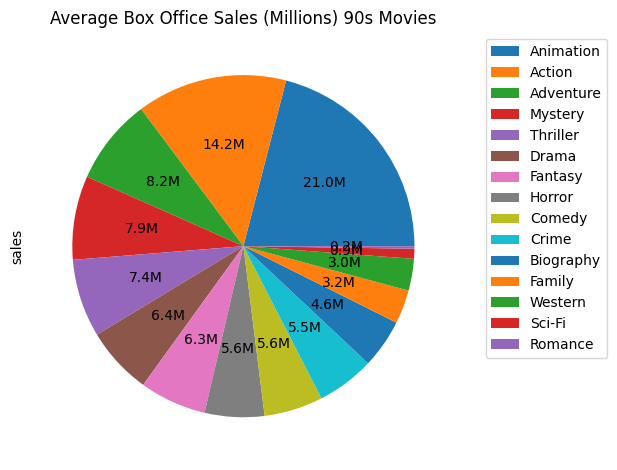

In [991]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot = genre_mean_sales_90s_df.plot(kind="pie", title="Average Box Office Sales (Millions) 90s Movies", y='sales', labels=None, autopct='%1.1fM')
plt.legend(loc='best', fontsize=10, bbox_to_anchor=(1.05, 1), labels=genre_mean_sales_90s_df['genre'])

plt.subplots_adjust(left=0.1, right=0.9)
                         
plt.tight_layout()

## Ding Ding Ding!!
It appears that the clear winner, by average box office sales, of the most popular Genre of the 90s is Animation! This paints a very different picture than what IMDB ratings show. 

In [992]:
# Expand the code to include entire dataframe (1980-2020)
genre_mean_sales_all = movies_df.groupby('genre')['gross'].mean()
genre_mean_sales_all_df = genre_mean_sales_all.to_frame().reset_index()
genre_mean_sales_all_df.columns = ['genre', 'sales']
genre_mean_sales_all_df = genre_mean_sales_all_df.sort_values(by='sales', ascending=False)

genre_mean_sales_all_df

,genre,sales
2,Animation,2.392300e+08
7,Family,1.961725e+08
0,Action,1.455086e+08
1,Adventure,1.093252e+08
12,Mystery,1.011835e+08
3,Biography,4.787432e+07
9,Horror,4.737241e+07
4,Comedy,4.433187e+07
5,Crime,3.940120e+07
6,Drama,3.893096e+07


<Figure size 1000x600 with 0 Axes>

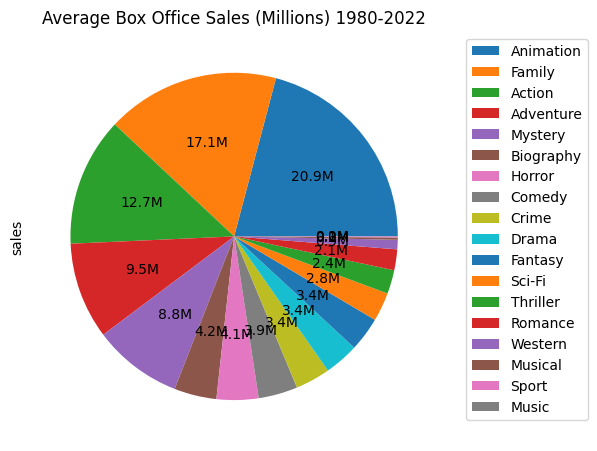

In [993]:
plt.figure(figsize=(10, 6))
plot = genre_mean_sales_all_df.plot(kind="pie", title="Average Box Office Sales (Millions) 1980-2022", y='sales', labels=None, autopct='%1.1fM')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize=10, labels=genre_mean_sales_all_df['genre'])


                                                          
plt.tight_layout()

## And the reults are in!

The top ranked Genre, from 1980-2020, according to average box office sales is still Animation.

So to answer the original Hypothesis, the most popular Genre of film for the 90s decade, according to average IMDB ratings,
is 'Biography'. This differs wildly from what average gross box office sales indicates, with it showing 'Animation' to be the clear winner of the 90s decade.
Furthermore, it was interesting to see that over the span of approximately 40 years, 'Animation' still reigns supreme.

 I guess it just goes to show that we truly never grow up.